# **Análise de Dados sobre o RH**
Obter insights do departamento de Recursos Humanos (RH) permitem uma tomada de decisões baseadas em dados, melhorando o desempenho dos funcionários e a retenção de talentos. Além disso, ajudam no desenvolvimento de lideranças e no planejamento estratégico, preparando a empresa para o futuro.

## **Objetivo da Análise**

O objetivo desta análise exploratória é obter insights acerca dos Salários, Educacão, Experiência, Idade, Genêro entre outros de forma geral, Ela fornece uma compreensão mais profunda dos dados, que pode ser útil para a tomada de decisões.

## **Bibliotecas Utilizadas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## **Verificando os 5 primeiros e 5 últimos elementos**

In [2]:
base_dados = pd.read_csv('salary_prediction_data.csv')
base_dados.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [3]:
base_dados.tail()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720
999,High School,25,Urban,Director,41,Female,71077.000066


## **Renomeando as colunas e verificando as dimensões**

In [4]:
# Renomenado as colunas para portugues
base_dados.rename(columns={
    'Education' : 'Educacao',
    'Experience' : 'Experiencia',
    'Location' : 'Localizacao',
    'Job_Title' : 'Cargo',
    'Age' : 'Idade',
    'Gender' : 'Genero',
    'Salary' : 'Salario'
}, inplace=True)

# dimensao
base_dados.shape

(1000, 7)

## **Verificando se tem campos nulos**

In [5]:
base_dados.isnull().sum()

Educacao       0
Experiencia    0
Localizacao    0
Cargo          0
Idade          0
Genero         0
Salario        0
dtype: int64

## **Mostrando a descricão das variaveis quantitativas com a quantidade, média, desvio padrão, mínimo, primeiro quartil, mediana, terceiro quartil e máximo.**

In [6]:
base_dados.describe()

,Experiencia,Idade,Salario
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


### Fazendo uma análise da distribuição da Experiência, Salário e Idade, É útil para visualizar a densidade de probabilidade de uma variável contínua.

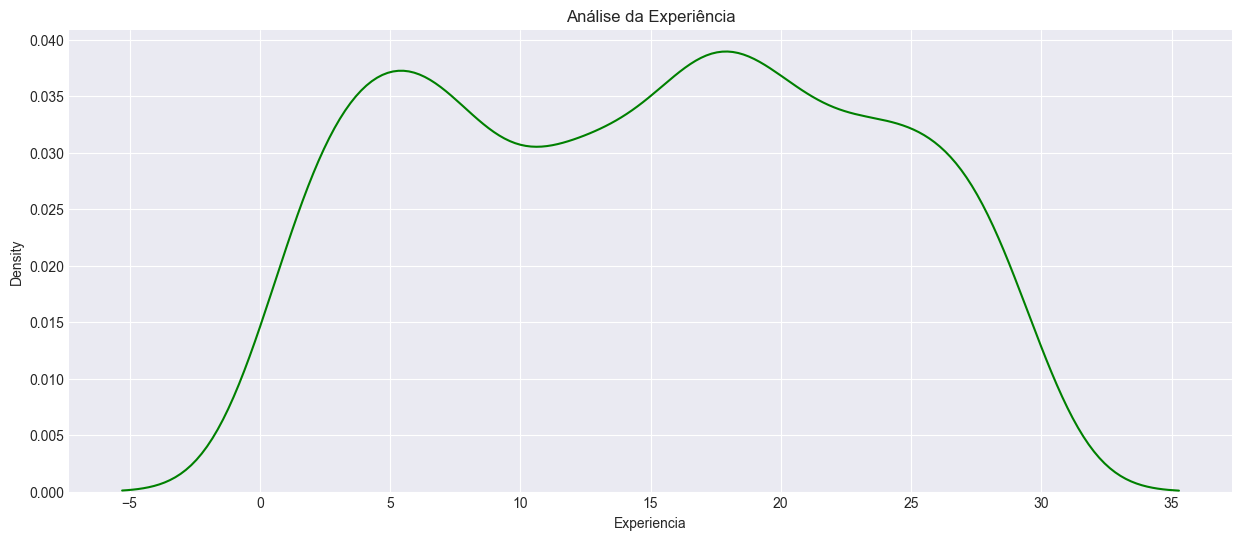

In [22]:
plt.figure(figsize=(15, 6))
plt.title('Análise da Experiência')
sns.kdeplot(base_dados['Experiencia'], color='green');

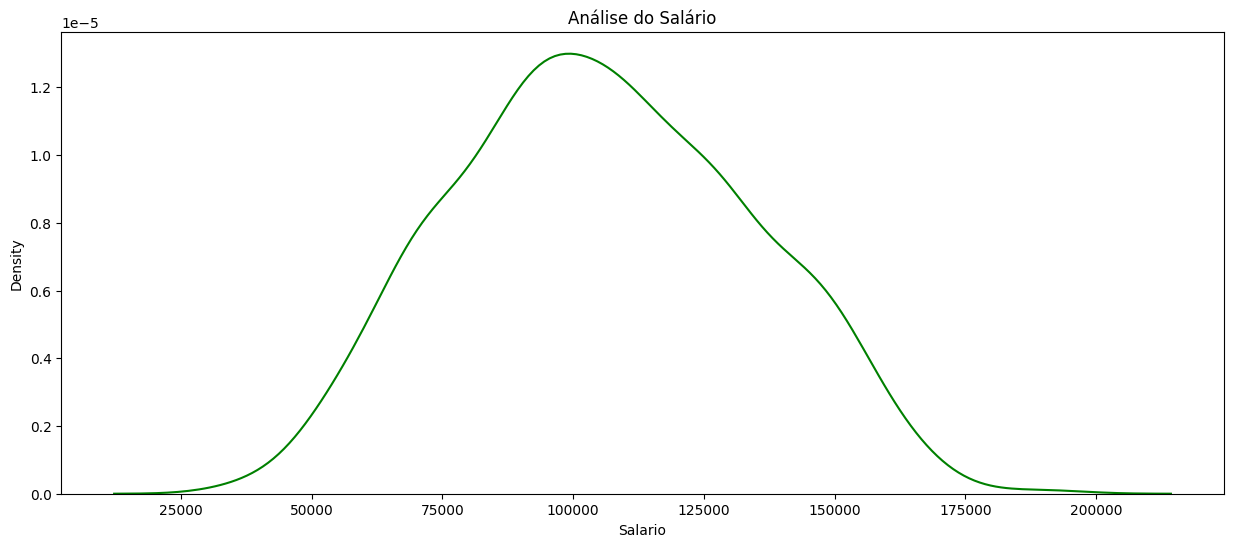

In [8]:
plt.figure(figsize=(15, 6))
plt.title('Análise do Salário')
sns.kdeplot(base_dados['Salario'], color='green');

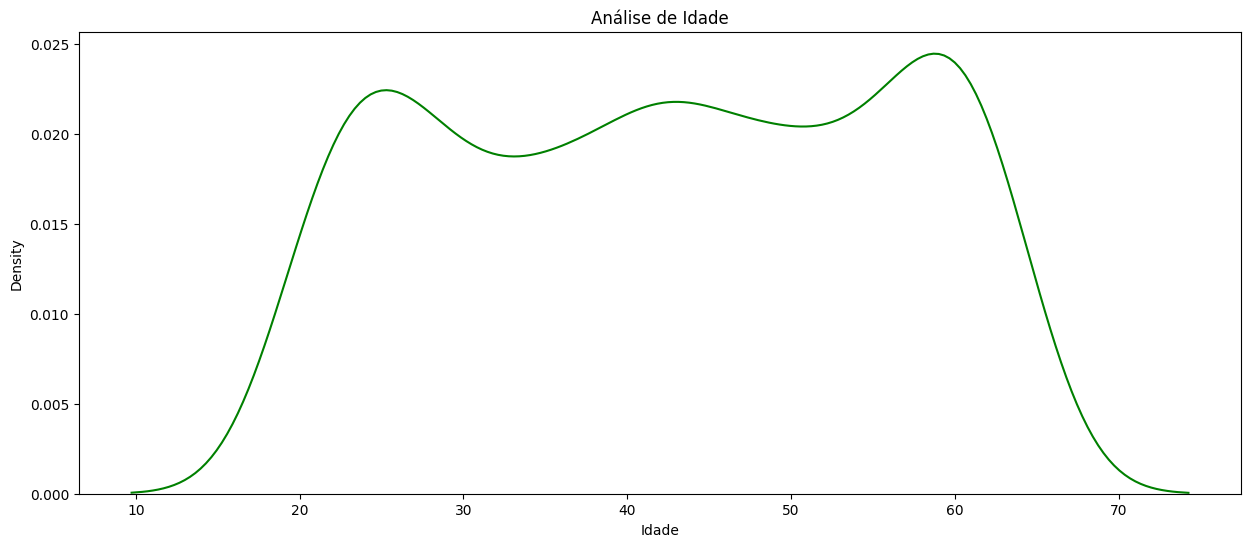

In [9]:
plt.figure(figsize=(15, 6))
plt.title('Análise de Idade')
sns.kdeplot(base_dados['Idade'], color='green');

A densidade da Idade e expêriencia se assemelham muito apesar de ter uma proporção diferente, enquanto a de salário tem seu pico maior em 100000 mil anual.

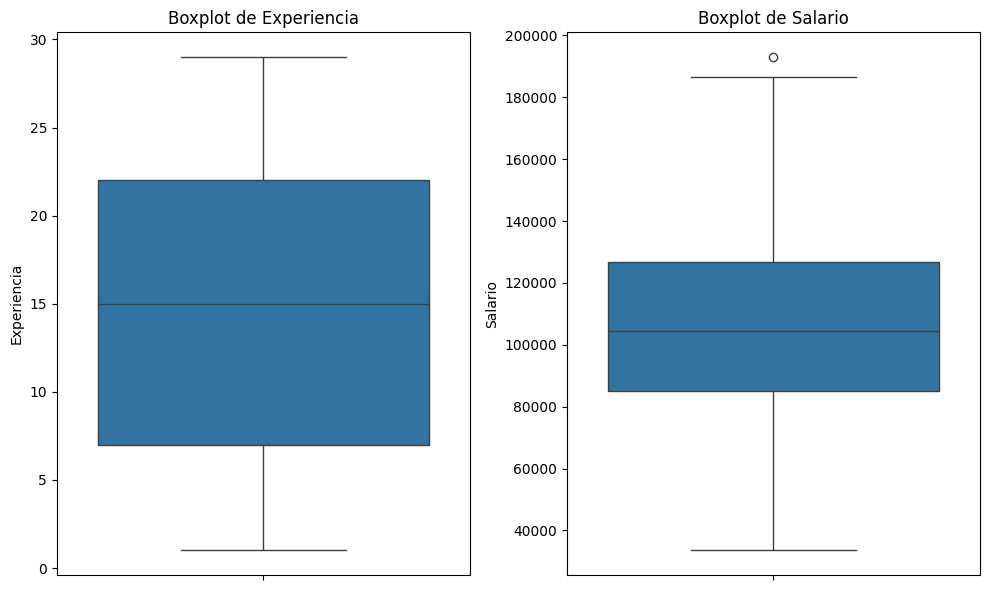

In [10]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=base_dados['Experiencia'])
plt.title('Boxplot de Experiencia')

plt.subplot(1, 2, 2)
sns.boxplot(y=base_dados['Salario'])
plt.title('Boxplot de Salario')

plt.tight_layout()
plt.show()

É interessante observar que são até que parecidos os boxplots, com a experiência sendo bastante simétrica e variada, com a maioria das pessoas tendo entre 10 e 20 anos de experiência.
Enquanto a distribuição dos salários tem um outlier no extremo superior, indicando que há pelo menos uma pessoa com um salário mais alto que o resto do grupo. A mediana do salário é um pouco acima de 100.000, e a maioria dos salários está entre 80.000 e 120.000.

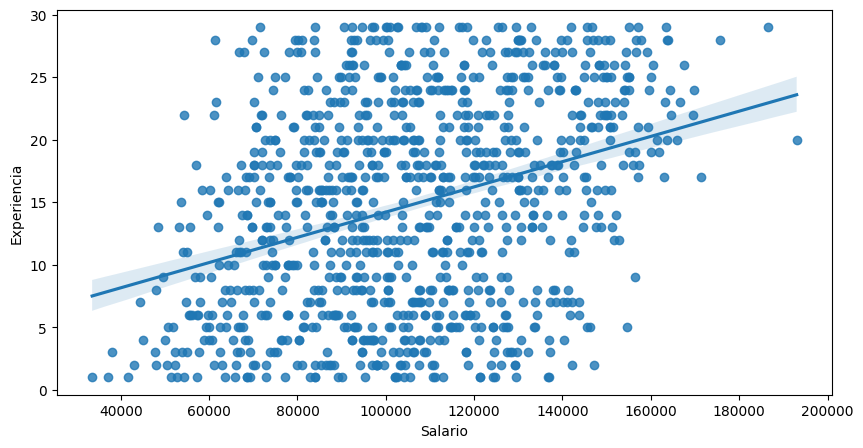

In [11]:
plt.figure( figsize=(10, 5) )
sns.regplot( data=base_dados, x='Salario', y='Experiencia');

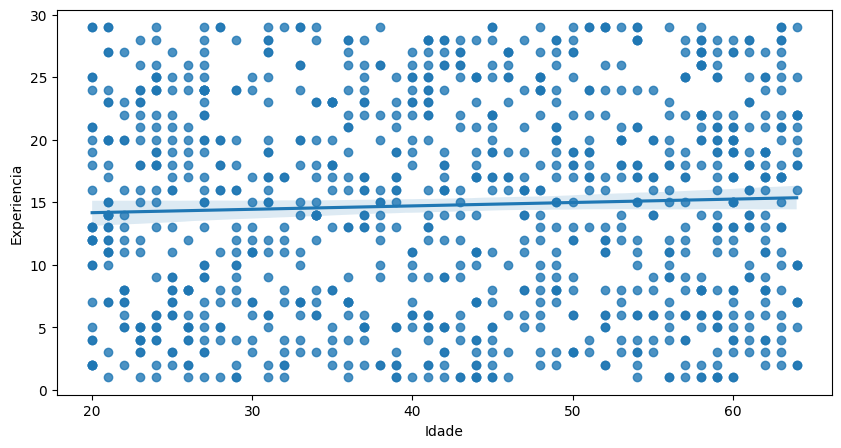

In [12]:
plt.figure( figsize=(10, 5) )
sns.regplot( data=base_dados, x='Idade', y='Experiencia');

A gente tem dois gráficos de regressãos, esse gráfico é usado para visualizar a relação entre duas variáveis numéricas, no primeiro Salário e Experiencia, no segundo idade e experiencia. Eles também incluiem uma linha de melhor ajuste (linha de regressão) para mostrar a tendência dos dados.

Nos dois casos temos os dados muito bem distribuidos, mas no caso do salário e experiencia, percebemos que os maiores salários sempre necessitam que a pessoa tenha entre a 15 a 30 anos de experiencia.

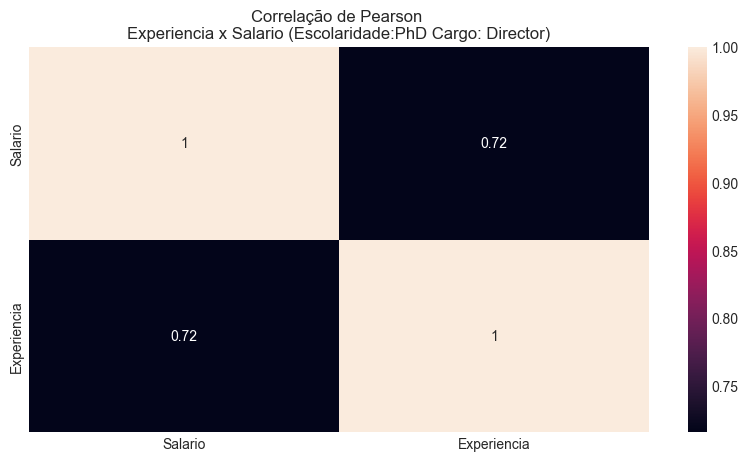

In [44]:
# Correlação experiencia x salario
diretores_phd = base_dados[(base_dados['Cargo'] == 'Director') & (base_dados['Educacao'] == 'PhD')]
Correlacao = diretores_phd[['Salario', 'Experiencia']].corr(method='pearson')
plt.figure(figsize=(10, 5))
sns.heatmap(Correlacao, annot=True, cbar=True)
plt.title('Correlação de Pearson \nExperiencia x Salario (Escolaridade:PhD Cargo: Director)')
plt.show()

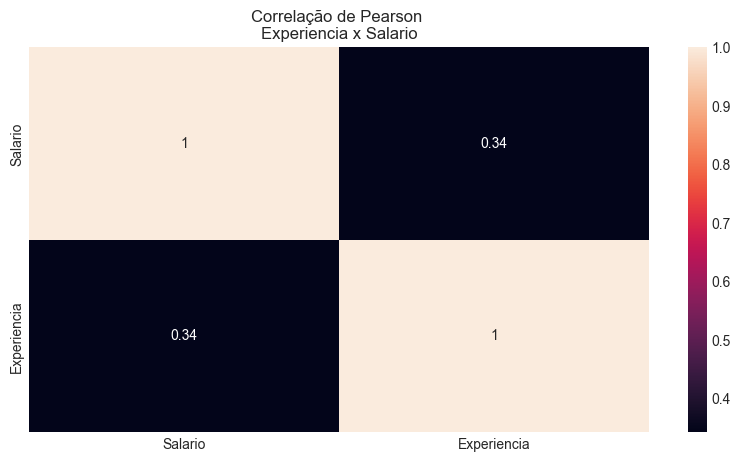

In [43]:
# Correlação experiencia x salario
Correlacao = base_dados[['Salario', 'Experiencia']].corr(method='pearson')
plt.figure(figsize=(10, 5))
sns.heatmap(Correlacao, annot=True, cbar=True)
plt.title('Correlação de Pearson \nExperiencia x Salario')
plt.show()

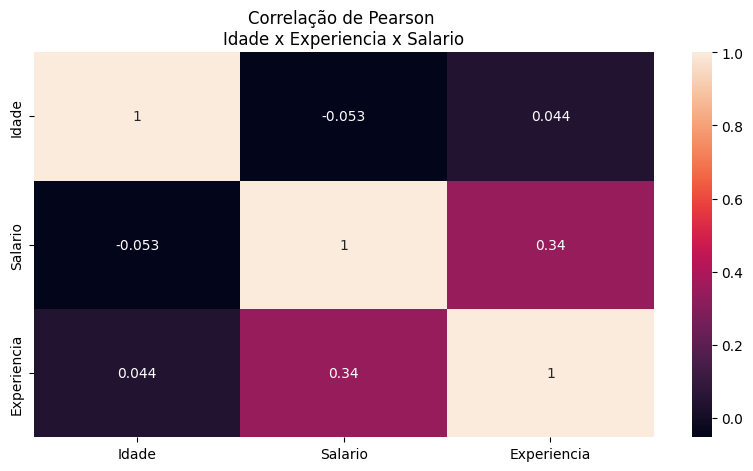

In [13]:
# Correlação idade x experiencia x salario
Correlacao = base_dados[['Idade', 'Salario', 'Experiencia']].corr(method='pearson')
plt.figure(figsize=(10, 5))
sns.heatmap(Correlacao, annot=True, cbar=True)
plt.title('Correlação de Pearson \nIdade x Experiencia x Salario')
plt.show()

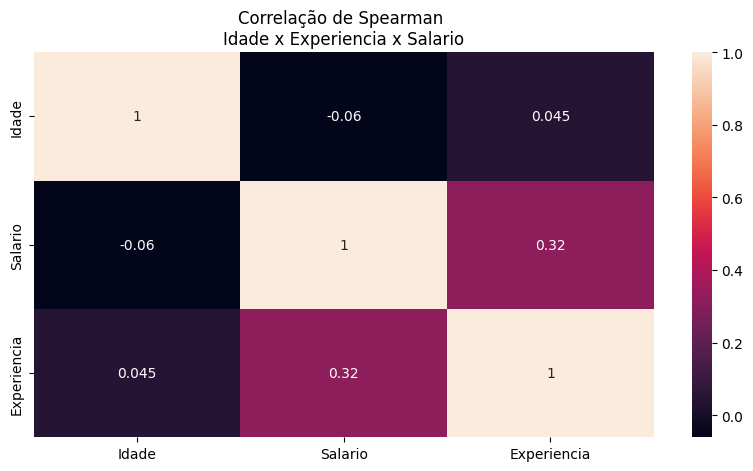

In [14]:
# Correlação idade x experiencia x salario
Correlacao = base_dados[['Idade', 'Salario', 'Experiencia']].corr(method='spearman')
plt.figure(figsize=(10, 5))
sns.heatmap(Correlacao, annot=True, cbar=True)
plt.title('Correlação de Spearman \nIdade x Experiencia x Salario')
plt.show()

Tentamos verificar se existe correlação entre idade, experiência e salário, através da correlação de Pearson e Spearman. A correlação é um valor entre -1 e 1. Um valor de correlação próximo de 1 indica uma forte correlação positiva, um valor próximo de -1 indica uma forte correlação negativa, e um valor próximo de 0 indica que não há correlação.
A correlação de Pearson assume que as variáveis são normalmente distribuídas, enquanto a correlação de Spearman não faz essa suposição.

Fiz uma filtragem para verificar a correlação entre experiência e salário de pessoas que são Phd e que são Diretores e tive um aumento consideravel se comparado com a correlação da base toda.

Enquanto que nos 2 modelos o (salário - idade) e (experiência - idade) são correlações muito fracas, o salário e a experiência existe uma correlação positiva fraca.

Importante mencionar que correlação não implica causalidade. Mesmo que duas variáveis estejam fortemente correlacionadas, isso não significa que uma causa a outra. 

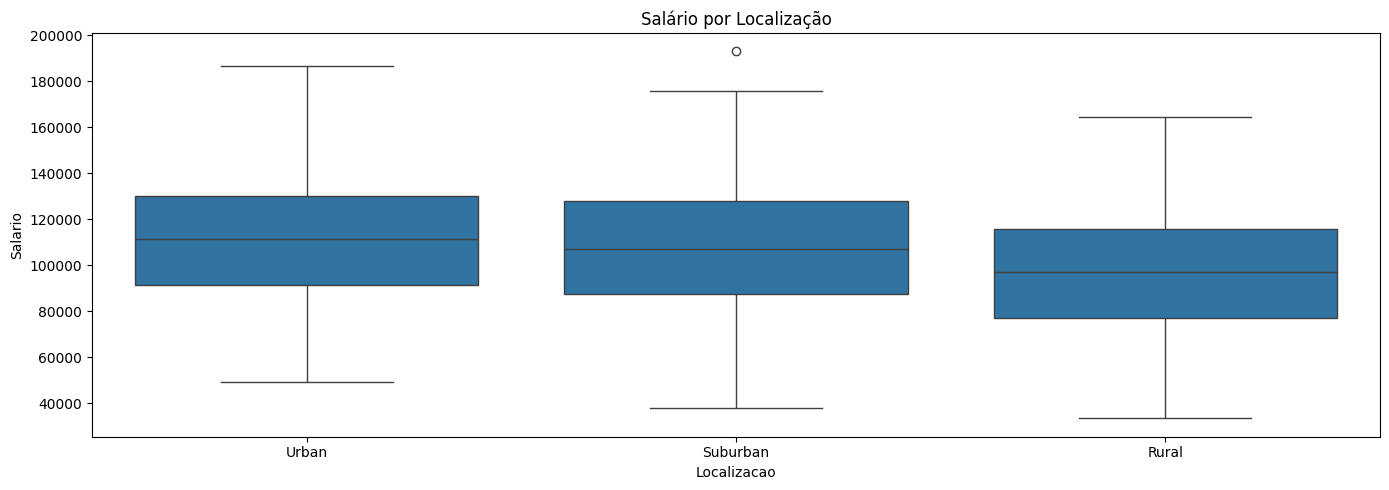

In [15]:
#Salário por Localização
plt.figure(figsize=(14, 5))
sns.boxplot(x='Localizacao', y='Salario', data=base_dados)
plt.title('Salário por Localização')
plt.tight_layout()
plt.show()

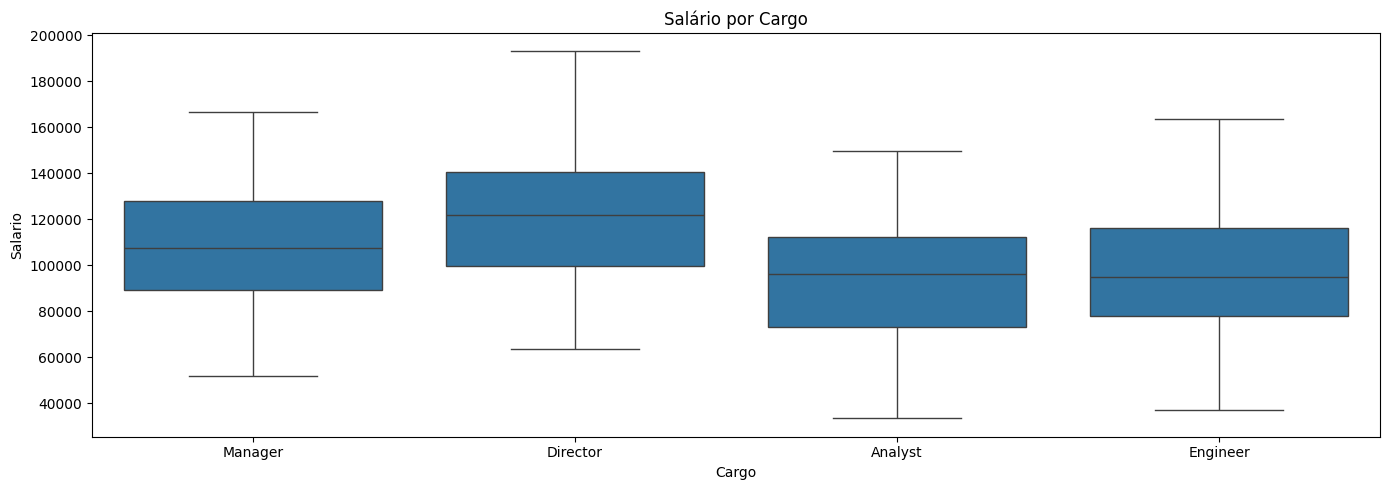

In [16]:
#Salário por Cargo
plt.figure(figsize=(14, 5))
sns.boxplot(x='Cargo', y='Salario', data=base_dados)
plt.title('Salário por Cargo')
plt.tight_layout()
plt.show()

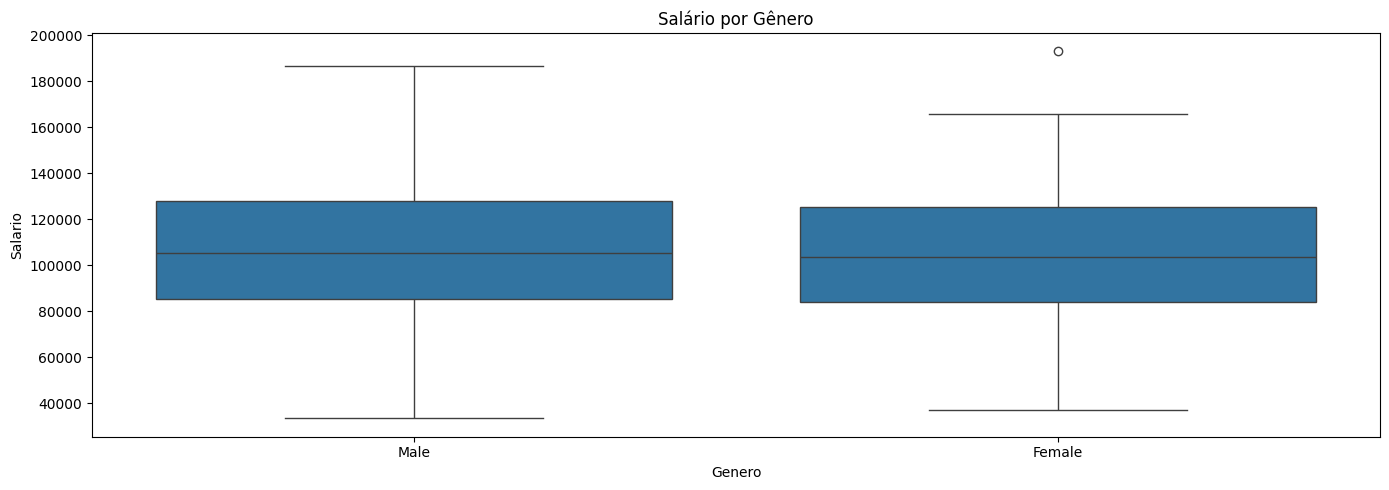

In [17]:
#Salário por Gênero
plt.figure(figsize=(14, 5))
sns.boxplot(x='Genero', y='Salario', data=base_dados)
plt.title('Salário por Gênero')
plt.tight_layout()
plt.show()

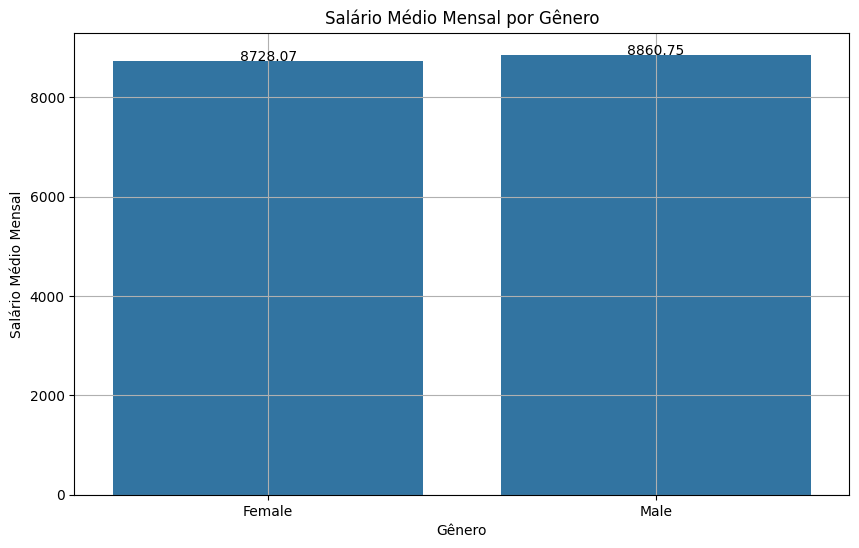

In [18]:
#Media salarial Masculino e Feminino
media_salario_genero = base_dados.groupby('Genero')['Salario'].mean().reset_index()
media_salario_genero['Salario'] = media_salario_genero['Salario'] / 12
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Genero', y='Salario', data=media_salario_genero)
for i, row in media_salario_genero.iterrows():
    ax.text(i, row['Salario'], round(row['Salario'], 2), color='black', ha="center")
plt.title('Salário Médio Mensal por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Salário Médio Mensal')
plt.grid(True)
plt.show()

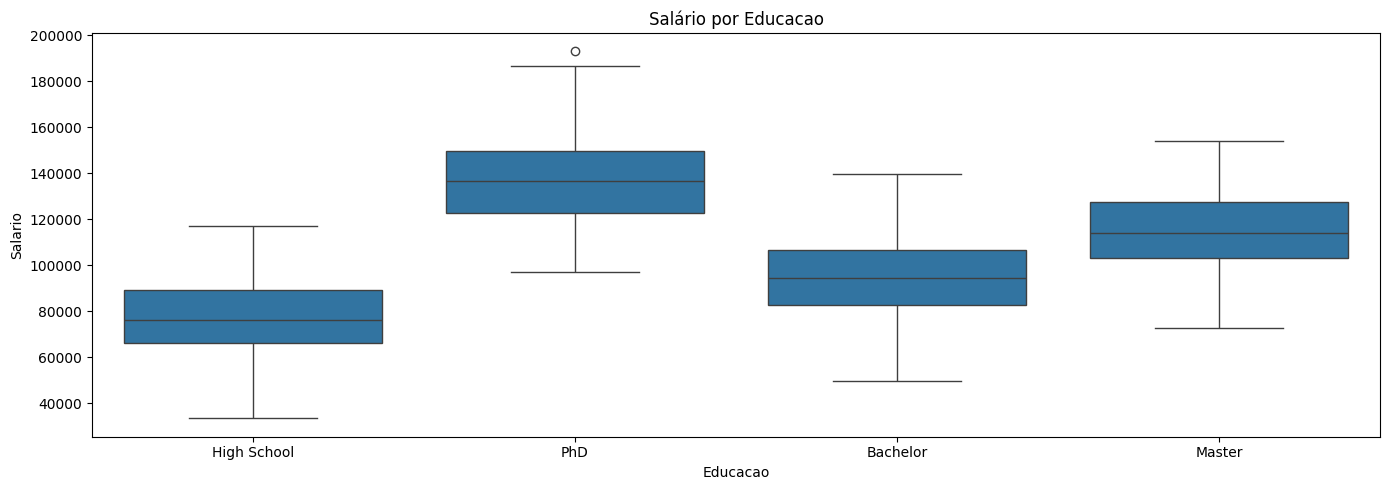

In [19]:
#Salário por Educação
plt.figure(figsize=(14, 5))
sns.boxplot(x='Educacao', y='Salario', data=base_dados)
plt.title('Salário por Educacao')
plt.tight_layout()
plt.show()

### **Salários por Localização**
Os Salários Urbanos tendem a ser mais altos em comparação com as outras áreas, Salários Suburbanos mostram maior variabilidade, com a presença de outliers, já os Salários Rurais são os menores entre as três categorias.

### **Salários por Cargo**
Entre os cargos temos o Diretor seguido do Gerente, ambos recebendo acima do Engenheiro e Analista, O Analista apesar de ser o que menos recebe, a linha no meio do retângulo indica que está mais próxima do quartil superior (Q3), isso indica que a maioria dos analistas tem salários mais altos.

### **Salários por Educação**
Os gráficos de caixa ilustram o salário mediano e a amplitude dentro de cada nível de educação é bastante variada, com ‘PhD’ mostrando
estar muito acima dos demais.

### **Salários por Gênero**
O salário entre homem e mulher se mostram bastante equilibrados com o do homem ainda um pouco acima.


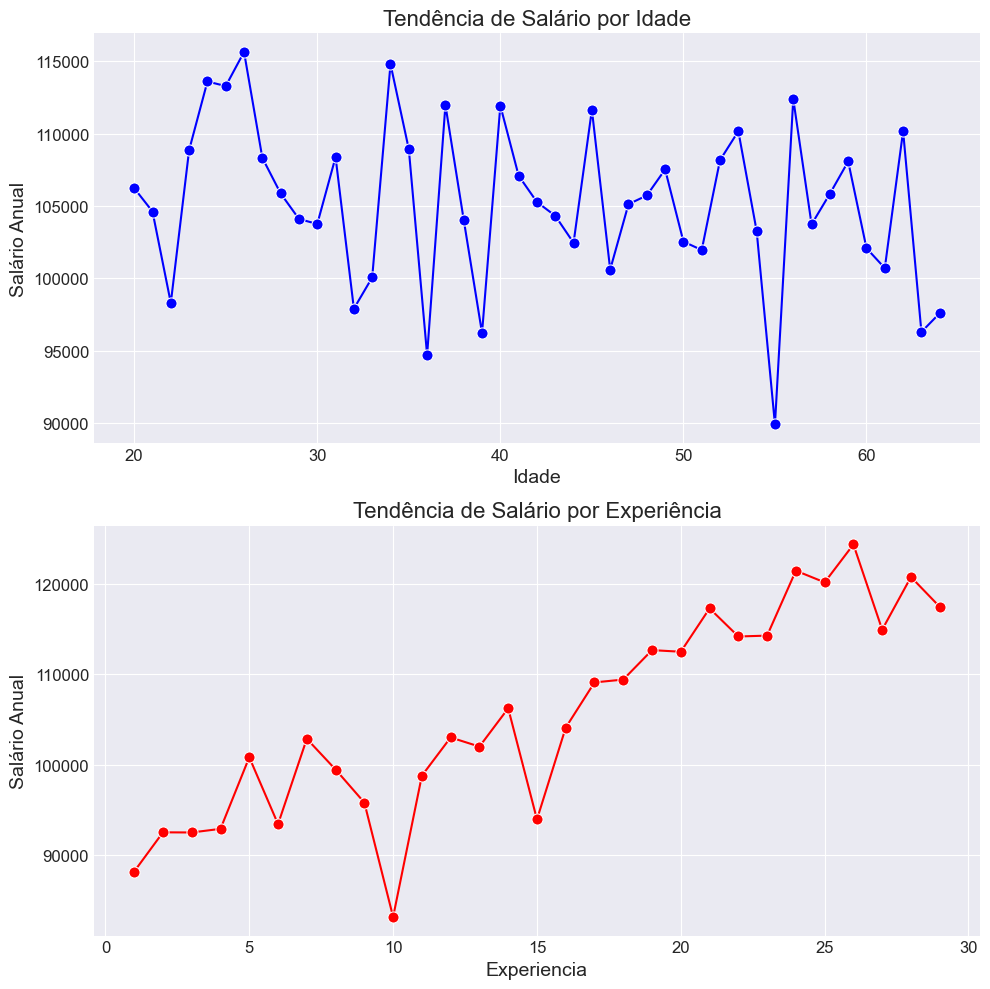

In [20]:
#Tendencia Salarial por Idade e Experiencia
plt.style.use('seaborn-darkgrid')
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
for ax, x_var, title in zip(axs, ['Idade', 'Experiencia'], ['Tendência de Salário por Idade', 'Tendência de Salário por Experiência']):
    sns.lineplot(ax=ax, x=x_var, y='Salario', data=base_dados, ci=None, color='blue' if x_var == 'Idade' else 'red', marker='o' if x_var == 'Idade' else 'o', markersize=8)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(x_var, fontsize=14)
    ax.set_ylabel('Salário Anual', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

### **Tendencia de Salários por idade e experiência**
A tendencia de salário por experiencia se mostra mais linear com quanto mais experiencia maior será o seu salário, já o por idade é mais diversificado.


## **Conclusão**
A análise de dados fornece insights cruciais sobre a relação entre experiência, salário, idade, emprego, localização, nível educacional e gênero. Os quadros iniciais mostram que as experiências dos são bastante semelhantes e variadas, com a maioria tendo entre 10 e 20 anos de experiência. Em contraste, a distribuição de salários mostra um outlier no topo, indicando que pelo menos uma pessoa tem um salário significativamente maior do que os outros. O salário médio é pouco acima de 100,000, com a maioria dos salários caindo entre 80,000 e 120,000.

A visualização das regressões entre salário e experiência, bem como idade e experiência mostra que os dados estão bem distribuídos. No entanto, a relação entre salário e experiência é mais clara: Os salários mais altos são geralmente associados com aqueles com 15-30 anos de experiência. Os coeficientes Pearson e Spearman foram usados para examinar a correlação entre estas variáveis, indicando a força e direção das relações. Embora a correlação entre a idade e o salário seja fraca, existe uma correlação fraca mas positiva entre o salário e a experiencia. Um filtro utilizado de pessoas que são Phd e que são Diretores encontrou uma correlação significativa entre experiência e salário, destacando suas importancias.

A análise salarial por localização, emprego, nível de educação e gênero acrescenta camadas de complexidade. Os salários urbanos são os mais altos, enquanto os salários rurais são mais baixos. Entre os empregos, diretores e gestores recebem mais do que engenheiros e analistas, apesar de Eles terem salários mais baixos, indicando uma tendência ascendente. As pessoas que são PhD ganham salários muito mais altos. A análise de gênero mostra uma pequena vantagem salarial para os homens em comparação com as mulheres, mas os salários globais são bastante equilibrados. As tendências salariais baseadas na experiência são mais lineares, com salários aumentando com a experiência, enquanto a relação com a idade é mais variada, indicando que a experiência desempenha um papel mais consistente na determinação do salário do que a idade.